## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import linear_model
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [3]:
class LinearRegressionBatchGD:
    def __init__(self,x,y,iteration,alpha):
        self.m=len(x)
        self.x=np.insert(x,0,np.ones(self.m),1)
        self.y=y
        self.theta=np.zeros(self.x.shape[1])
        self.alpha=alpha
        self.iteration=iteration
        self.costhist=[]
        self.thetahist=np.array([])
        self.hhist=[]
    def hypo(self,x,theta):
        return np.dot(theta,x.T)
    
    def loss(self,h,y):
        return (1/2*self.m)*np.square((np.sum(h-y)))
    
    def grad(self,h,y,x):
        return (1/self.m)*np.dot(x.T,(h-y))
    def train(self):
        for i in range (self.iteration):
            self.h=self.hypo(self.x,self.theta)
            self.cost=self.loss(self.h,self.y)
            self.gradient=self.grad(self.h,self.y,self.x)
            self.theta=self.theta-(self.alpha*self.gradient)

            self.costhist.append(self.cost)
            self.thetahist=np.append(self.thetahist,self.theta)
            self.hhist.append(self.h)
            
        return self.theta,self.h,self.costhist,self.thetahist.reshape(iteration,self.theta.shape[0]),self.hhist

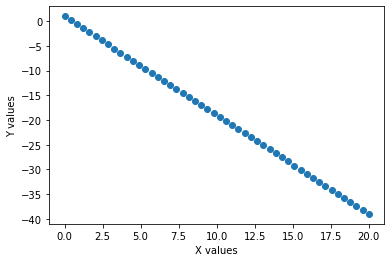

In [4]:
x=np.linspace(0,20)
xcpy=x.copy()
y=-2*x+1
x=x.reshape(len(x),1)

iteration=4000
alpha=0.01

plt.scatter(x,y)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()

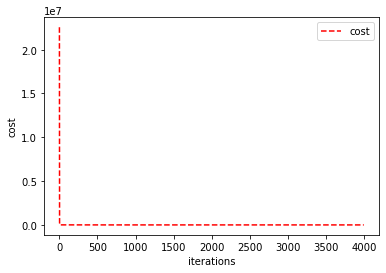

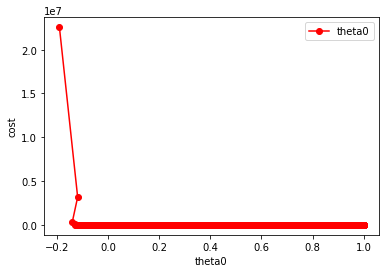

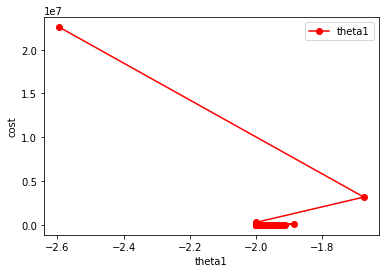

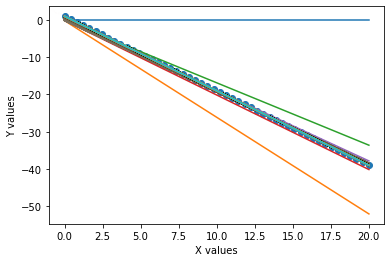

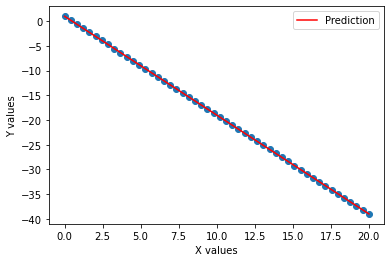

In [5]:
single_LR=LinearRegressionBatchGD(x,y,iteration,alpha) #single linear regression using batch GD without momentum

theta,h,costhist,thetahist,hhist=single_LR.train()


plt.plot(range(iteration),costhist,"r--",label="cost")
plt.xlabel("iterations")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,0],costhist,"r-o",label="theta0")
plt.xlabel("theta0")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,1],costhist,"r-o",label="theta1")
plt.xlabel("theta1")
plt.ylabel("cost")
plt.legend()
plt.show()


plt.scatter(xcpy,y)
plt.plot(xcpy, np.swapaxes(hhist,0,1),label="Prediction")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()

plt.scatter(xcpy,y)
plt.plot(xcpy, h,"r-",label="Prediction")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.show()

In [6]:
print("thetas value =: ",theta)
print("predicted values =: ",h)
print("model accuracy using r2 score = {}".format(r2_score(y,h)))

thetas value =:  [ 0.99995999 -1.99999702]
predicted values =:  [  0.99995989   0.18363458  -0.63269074  -1.44901605  -2.26534136
  -3.08166668  -3.89799199  -4.7143173   -5.53064261  -6.34696793
  -7.16329324  -7.97961855  -8.79594386  -9.61226918 -10.42859449
 -11.2449198  -12.06124512 -12.87757043 -13.69389574 -14.51022105
 -15.32654637 -16.14287168 -16.95919699 -17.77552231 -18.59184762
 -19.40817293 -20.22449824 -21.04082356 -21.85714887 -22.67347418
 -23.4897995  -24.30612481 -25.12245012 -25.93877543 -26.75510075
 -27.57142606 -28.38775137 -29.20407668 -30.020402   -30.83672731
 -31.65305262 -32.46937794 -33.28570325 -34.10202856 -34.91835387
 -35.73467919 -36.5510045  -37.36732981 -38.18365513 -38.99998044]
model accuracy using r2 score = 0.9999999999970137


#### Try your function with any input parameterss of your choice.

#### Calculate r2 score

#### Plot loss vs. epochs

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

#### Plot all regression lines till converge

#### Plot the best regression line

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [8]:
class LinearRegressionMiniBatch:
    def __init__(self,x,y,iteration,alpha,batchsize):
        self.m=len(x)
        self.x=np.insert(x,0,np.ones(self.m),1)
        self.y=y
        self.theta=np.zeros(self.x.shape[1])
        self.alpha=alpha
        self.iteration=iteration
        self.costhist=[]
        self.hhist=[]

        self.thetahist=np.array([])
        
        self.batchsize=batchsize #batchsize
        self.start=0 #start of the batch
        self.batches=self.m//self.batchsize #calculate number of batches
        self.end=self.batchsize #end of the batch
        
    def hypo(self,x,theta):
        return np.dot(x,theta)
    
    def loss(self,h,y):
        return (1/2*self.batchsize)*np.square((np.sum(h-y))) #cost function of minibatch
    
    def grad(self,h,y,x):
        return (1/self.batchsize)*np.dot(x.T,(h-y)) #gradient of mini batch
    def train(self):
        for i in range (self.iteration):  
            for j in range(self.batches): 
                self.h=self.hypo(self.x[self.start:self.end,:],self.theta)
                self.cost=self.loss(self.h,self.y[self.start:self.end])
                self.gradient=self.grad(self.h,self.y[self.start:self.end],self.x[self.start:self.end,:])
                self.theta=self.theta-(self.alpha*self.gradient)
                   
                self.costhist.append(self.cost)
                
                self.thetahist=np.append(self.thetahist,self.theta)
                #take the next batch
                
                self.start+=self.batchsize
                self.end+=self.batchsize
                    
                
            self.start,self.end=0,self.batchsize
            self.htemp=np.dot(self.x,self.theta)
            self.hhist.append(self.htemp)
                
        self.h=np.dot(self.x,self.theta)
            
            
        return self.theta,self.h,self.costhist,self.thetahist.reshape((iteration*self.batches),self.theta.shape[0]),self.hhist
    

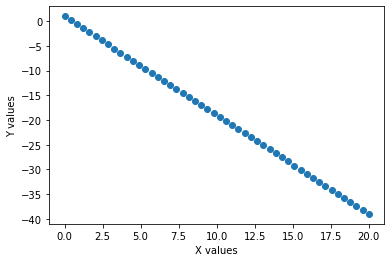

In [9]:
x=np.linspace(0,20)
xcpy=x.copy()
y=-2*x+1
x=x.reshape(len(x),1)
batchsize=3
batches=len(xcpy)//batchsize

iteration=300
alpha=0.01

plt.scatter(x,y)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()

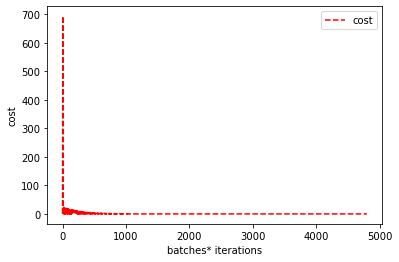

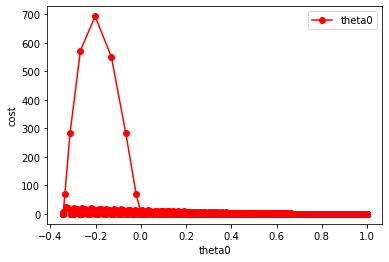

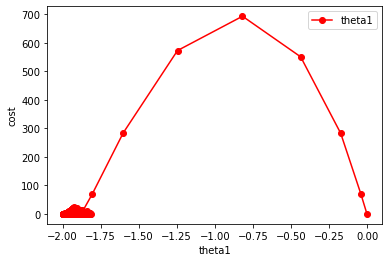

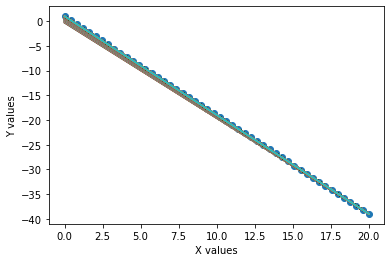

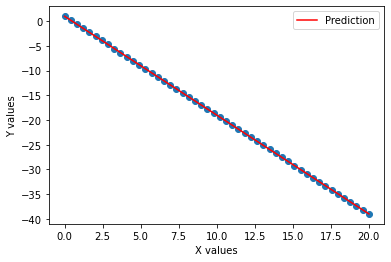

In [10]:
single_LR=LinearRegressionMiniBatch(x,y,iteration,alpha,batchsize) #single linar Regression using mini batch GD

theta,h,costhist,thetahist,hhist=single_LR.train()


plt.plot(range((iteration*batches)),costhist,"r--",label="cost")
plt.xlabel("batches* iterations")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,0],costhist,"r-o",label="theta0")
plt.xlabel("theta0")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,1],costhist,"r-o",label="theta1")
plt.xlabel("theta1")
plt.ylabel("cost")
plt.legend()
plt.show()


plt.scatter(xcpy,y)
plt.plot(xcpy, np.swapaxes(hhist,0,1),label="Prediction")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()



plt.scatter(xcpy,y)
plt.plot(xcpy, h, 'r-',label="Prediction")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.show()

In [11]:
print("thetas value =: ",theta)
print("predicted values =: ",h)
print("model accuracy using r2 score = {}".format(r2_score(y,h)))

thetas value =:  [ 0.99978696 -1.99998931]
predicted values =:  [  0.99978696   0.18346479  -0.63285738  -1.44917954  -2.26550171
  -3.08182388  -3.89814605  -4.71446821  -5.53079038  -6.34711255
  -7.16343472  -7.97975688  -8.79607905  -9.61240122 -10.42872339
 -11.24504555 -12.06136772 -12.87768989 -13.69401206 -14.51033422
 -15.32665639 -16.14297856 -16.95930073 -17.77562289 -18.59194506
 -19.40826723 -20.22458939 -21.04091156 -21.85723373 -22.6735559
 -23.48987806 -24.30620023 -25.1225224  -25.93884457 -26.75516673
 -27.5714889  -28.38781107 -29.20413324 -30.0204554  -30.83677757
 -31.65309974 -32.46942191 -33.28574407 -34.10206624 -34.91838841
 -35.73471058 -36.55103274 -37.36735491 -38.18367708 -38.99999924]
model accuracy using r2 score = 0.9999999998902467


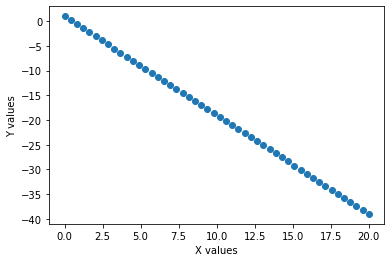

In [12]:
x=np.linspace(0,20)
xcpy=x.copy()
y=-2*x+1
x=x.reshape(len(x),1)
batchsize=3
batches=len(xcpy)//batchsize

iteration=500
alpha=0.0001

plt.scatter(x,y)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()

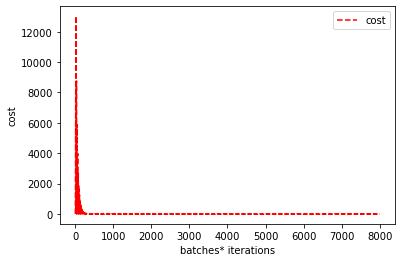

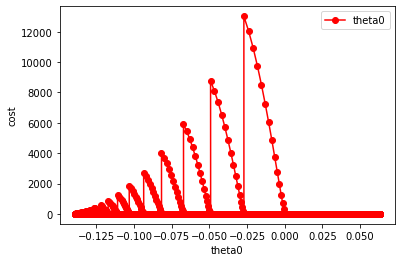

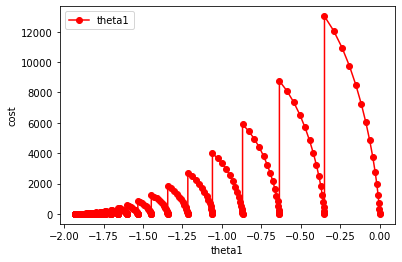

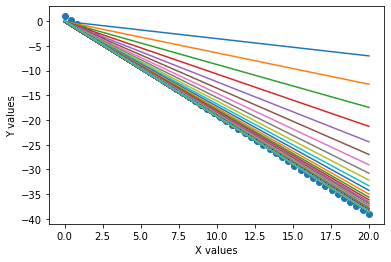

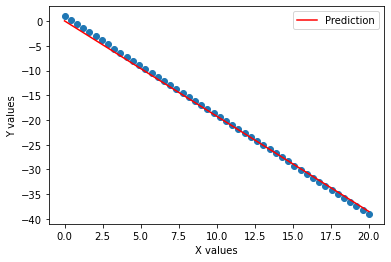

In [13]:
single_LR=LinearRegressionMiniBatch(x,y,iteration,alpha,batchsize) #single linar Regression using mini batch GD

theta,h,costhist,thetahist,hhist=single_LR.train()


plt.plot(range((iteration*batches)),costhist,"r--",label="cost")
plt.xlabel("batches* iterations")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,0],costhist,"r-o",label="theta0")
plt.xlabel("theta0")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,1],costhist,"r-o",label="theta1")
plt.xlabel("theta1")
plt.ylabel("cost")
plt.legend()
plt.show()


plt.scatter(xcpy,y)
plt.plot(xcpy, np.swapaxes(hhist,0,1),label="Prediction")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()



plt.scatter(xcpy,y)
plt.plot(xcpy, h, 'r-',label="Prediction")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.show()

In [14]:
print("thetas value =: ",theta)
print("predicted values =: ",h)
print("model accuracy using r2 score = {}".format(r2_score(y,h)))

thetas value =:  [ 0.06282584 -1.92891517]
predicted values =:  [  0.06282584  -0.72448648  -1.51179879  -2.29911111  -3.08642342
  -3.87373574  -4.66104805  -5.44836037  -6.23567268  -7.022985
  -7.81029731  -8.59760963  -9.38492194 -10.17223426 -10.95954657
 -11.74685889 -12.5341712  -13.32148352 -14.10879583 -14.89610815
 -15.68342046 -16.47073278 -17.25804509 -18.04535741 -18.83266972
 -19.61998204 -20.40729435 -21.19460667 -21.98191898 -22.7692313
 -23.55654361 -24.34385593 -25.13116824 -25.91848056 -26.70579287
 -27.49310519 -28.2804175  -29.06772982 -29.85504213 -30.64235445
 -31.42966676 -32.21697908 -33.00429139 -33.79160371 -34.57891602
 -35.36622834 -36.15354065 -36.94085297 -37.72816528 -38.5154776 ]
model accuracy using r2 score = 0.9983676269705755


## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [19]:
class LinearRegressionStochasticGD:
    def __init__(self,x,y,iteration,alpha):
        self.m=len(x)
        self.x=np.insert(x,0,np.ones(self.m),1)
        self.y=y
        self.theta=np.zeros(self.x.shape[1])
        self.alpha=alpha
        self.iteration=iteration
        self.costhist=[]
        self.thetahist=np.array([])
        self.hhist=[]
    def hypo(self,x,theta):
        return np.dot(theta,x.T)
    
    def loss(self,h,y):
        return np.square((np.sum(h-y)))
    
    def grad(self,h,y,x):
        return 2*np.dot(x.T,(h-y))
    
    def train(self):
        for i in range (self.iteration):
            for j in range (self.m): #to update theta after every observation
                self.h=self.hypo(self.x[j,:],self.theta)
                self.cost=self.loss(self.h,self.y[j])
                self.gradient=self.grad(self.h,self.y[j],self.x[j,:])

                self.theta=self.theta-(self.alpha*self.gradient)                

                self.costhist.append(self.cost)
                self.thetahist=np.append(self.thetahist,self.theta)
            self.htemp=np.dot(self.x,self.theta)
            self.hhist.append(self.htemp)
        self.h=np.dot(self.x,self.theta)
        return self.theta,self.h,self.costhist,self.thetahist.reshape(iteration*self.m,self.theta.shape[0]),self.hhist
    

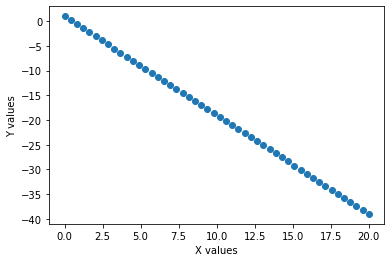

In [44]:
x=np.linspace(0,20)
xcpy=x.copy()
y=-2*x+1
x=x.reshape(len(x),1)


iteration=200
alpha=0.001

plt.scatter(x,y)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()

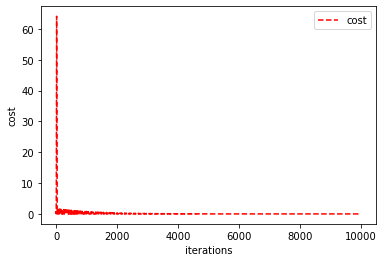

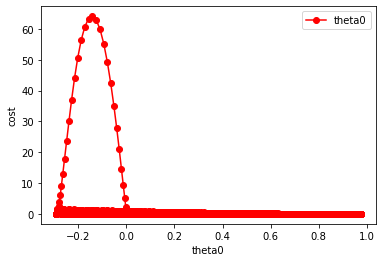

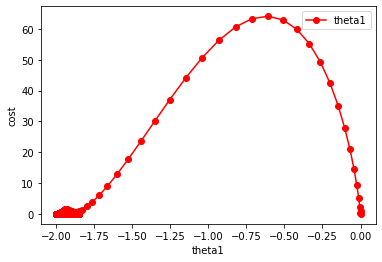

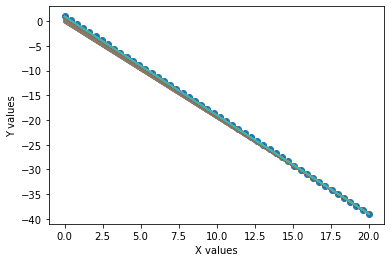

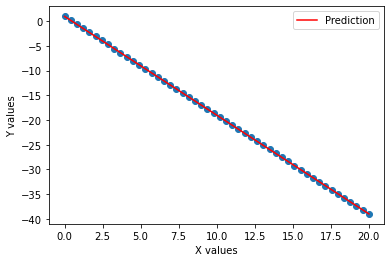

In [45]:
single_LR=LinearRegressionStochasticGD(x,y,iteration,alpha) #single linar Regression using Stochastic GD

theta,h,costhist,thetahist,hhist=single_LR.train()


plt.plot(range(iteration*len(xcpy)),costhist,"r--",label="cost")
plt.xlabel("iterations")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,0],costhist,"r-o",label="theta0")
plt.xlabel("theta0")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,1],costhist,"r-o",label="theta1")
plt.xlabel("theta1")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.scatter(xcpy,y)
plt.plot(xcpy, np.swapaxes(hhist,0,1),label="Prediction")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()


plt.scatter(xcpy,y)
plt.plot(xcpy, h, 'r-',label="Prediction")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.show()

In [47]:
print("thetas value =: ",theta)
print("predicted values =: ",h)
print("model accuracy using r2 score = {}".format(r2_score(y,h)))

thetas value =:  [ 0.9735211  -1.99866875]
predicted values =:  [  0.9735211    0.15773794  -0.65804523  -1.47382839  -2.28961156
  -3.10539472  -3.92117789  -4.73696105  -5.55274422  -6.36852738
  -7.18431055  -8.00009371  -8.81587688  -9.63166004 -10.44744321
 -11.26322637 -12.07900954 -12.8947927  -13.71057587 -14.52635903
 -15.34214219 -16.15792536 -16.97370852 -17.78949169 -18.60527485
 -19.42105802 -20.23684118 -21.05262435 -21.86840751 -22.68419068
 -23.49997384 -24.31575701 -25.13154017 -25.94732334 -26.7631065
 -27.57888967 -28.39467283 -29.210456   -30.02623916 -30.84202233
 -31.65780549 -32.47358866 -33.28937182 -34.10515499 -34.92093815
 -35.73672132 -36.55250448 -37.36828765 -38.18407081 -38.99985398]
model accuracy using r2 score = 0.9999983077698604
